In [2]:
# for importing dataset

import numpy as np
import pandas as pd

# for performing text clustering 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# for providing the path

import os

# for  visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [12]:
# importing the excel life
data = pd.read_csv("your.csv", header = None)

In [13]:
data.shape

(200, 2)

In [14]:
# assigning names to the columns

data.columns = ['ID', 'Text']
data.columns

Index(['ID', 'Text'], dtype='object')

In [15]:
# getting the length of the text 
data['Length'] = data['Text'].apply(len)

In [17]:
#describing the dataset

data.groupby('Length').describe().head(10)

ID                                              
       count   mean std    min    25%    50%    75%    max
Length                                                    
648      1.0  103.0 NaN  103.0  103.0  103.0  103.0  103.0
721      1.0  154.0 NaN  154.0  154.0  154.0  154.0  154.0
742      1.0  161.0 NaN  161.0  161.0  161.0  161.0  161.0
743      1.0    6.0 NaN    6.0    6.0    6.0    6.0    6.0
758      1.0  184.0 NaN  184.0  184.0  184.0  184.0  184.0
760      1.0   77.0 NaN   77.0   77.0   77.0   77.0   77.0
765      1.0  167.0 NaN  167.0  167.0  167.0  167.0  167.0
784      1.0   64.0 NaN   64.0   64.0   64.0   64.0   64.0
786      1.0   46.0 NaN   46.0   46.0   46.0   46.0   46.0
789      1.0  194.0 NaN  194.0  194.0  194.0  194.0  194.0

In [19]:
data.head(5)

,ID,Text,Length
0,0,Claxton hunting first major medal\n\nBritish h...,1238
1,1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,902
2,2,Greene sets sights on world title\n\nMaurice G...,2045
3,3,IAAF launches fight against drugs\n\nThe IAAF ...,1125
4,4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",939


C:\Users\aakansha neema\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\aakansha neema\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


Text(0.5, 1.0, 'The Distribution of Length over the Texts')

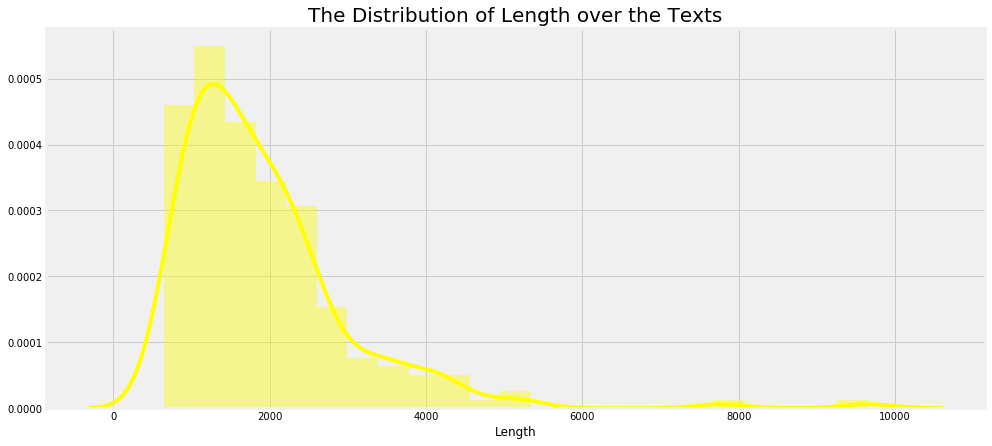

In [21]:
# looking at the distribution of length of the different texts

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(data['Length'], color = 'yellow')
plt.title('The Distribution of Length over the Texts', fontsize = 20)

Text(0.5, 1.0, 'WordCloud')

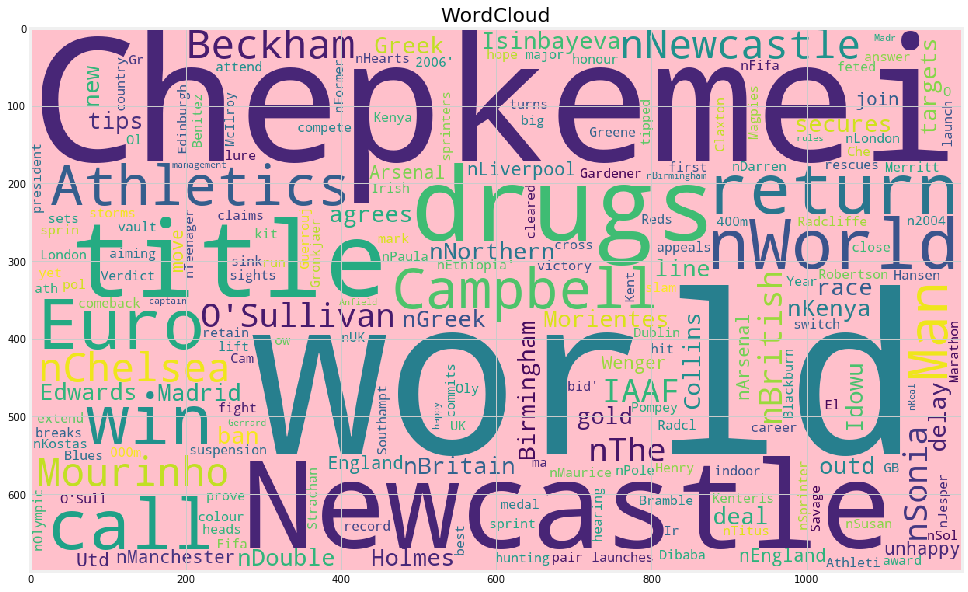

In [23]:
# word cloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'pink',
                          width = 1200,
                          height = 700).generate(str(data['Text']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud", fontsize = 20)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

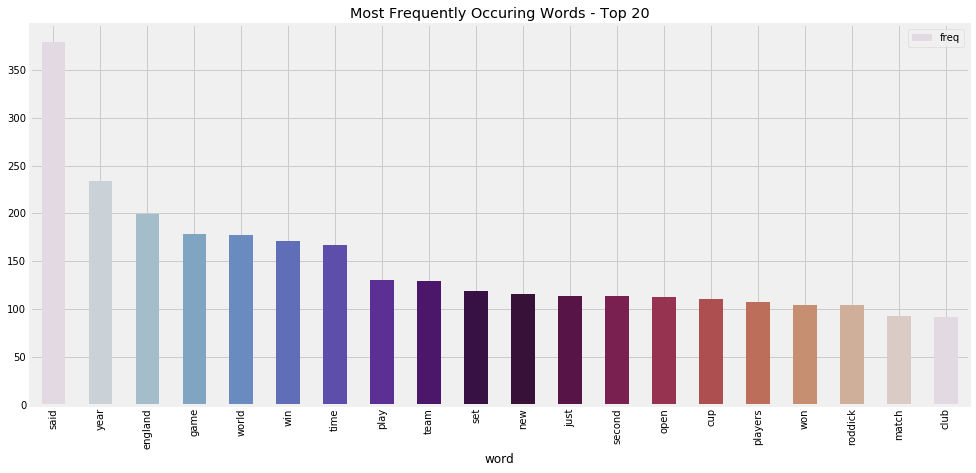

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['Text'])
sum_words = words.sum(axis = 0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15,7), color = color)

plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

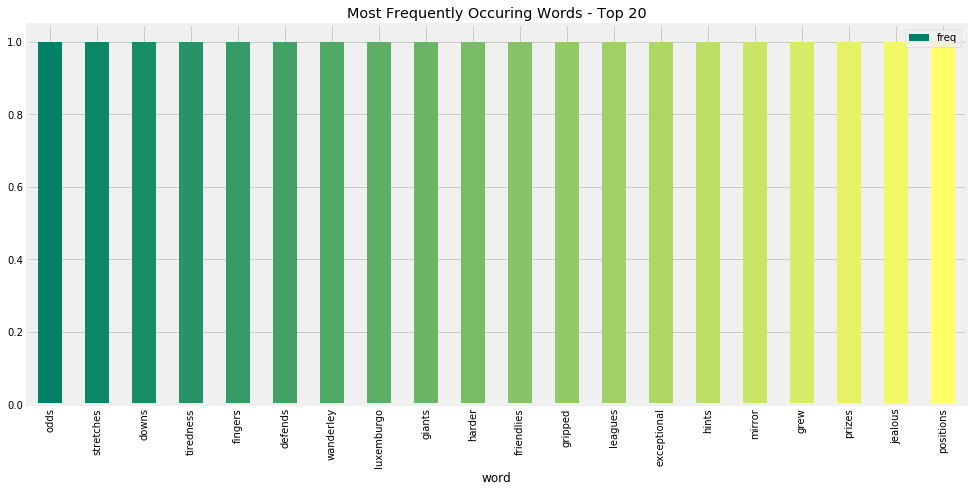

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['Text'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns = ['word', 'freq'])

color = plt.cm.summer(np.linspace(0,1,20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [27]:
# Data Preprocessing
# cleaning the texts
# importing the libraries for natural language processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\aakansha
[nltk_data]     neema\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [28]:
# cleaning the data

corpus = []

for i in range (0, 200) :
    review = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    review = ' '.join(review)
    corpus.append(review)

In [29]:
# vectorizing the data using Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features = 2000)
X = vectorizer.fit_transform(data['Text'])

# getting the shape of X

print("Shape of X :", X.shape)




Shape of X : (200, 2000)


In [31]:
# Clustering

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:"% i ),
    for ind in order_centroids[i, :10]:
        print('%s'% terms[ind]),
    print
    
print("\n")
print("Predictions")
        

Top terms per cluster:
Cluster 0:
england
said
game
win
play
cup
club
open
team
players
Cluster 1:
world
year
champion
athletics
olympic
athens
race
indoor
said
won


Predictions
